In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = sns.load_dataset('iris')

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.to_csv('iris.csv')

In [8]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:

data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
# Performing EDA Analysis

In [11]:
# Extracting all the continuous columns. As we see, we have target column in object type. Rest all are conitinuous
continuous_cols = [col for col in data.columns if data[col].dtype != 'object']

In [12]:
continuous_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [13]:
# Univariate analysis
# Creating a function for histogram and kde plots

def kde_plot(feature):
    fig, ax = plt.subplots(figsize = (8, 6))
    sns.kdeplot(data[feature], ax = ax)
    ax.set_title = 'Histogram of {}'.format(' '.join(feature.split('_')).title())
    
    

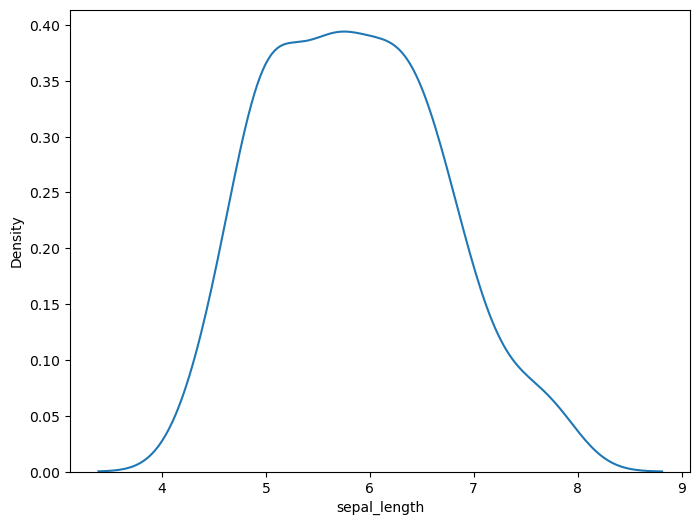

In [14]:
# Hist plot of first column Sepal Length
kde_plot('sepal_length')

- We can see that the above plot is close to normal distribution, where most of the data points are falling in between 5 and 7

In [15]:
((data['sepal_length'] > 4.8) & (data['sepal_length'] < 6.8)).sum()

114

In [16]:
# Univariate analysis
# Creating a function for histogram 

def hist_plot(feature):
    fig, ax = plt.subplots(figsize = (8, 6))
    sns.distplot(data[feature], kde = False, ax = ax)
    ax.set_title = 'Histogram of {}'.format(' '.join(feature.split('_')).title())
    
    

C:\Users\divu\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


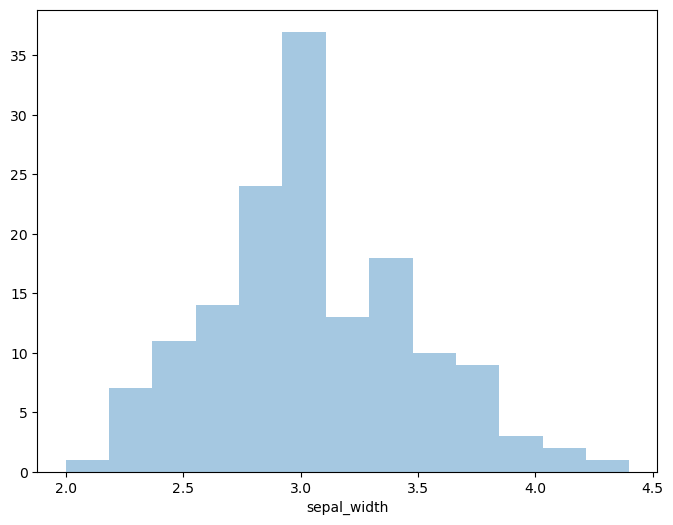

In [17]:
# Hist plot of second column Sepal Width
hist_plot('sepal_width')

In [18]:
# Changing the categorical-string values in the target column to numbers using Label Encoder

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
species = le.fit_transform(data['species'])

In [22]:
data_new = pd.DataFrame(data= data[continuous_cols], columns=continuous_cols)

In [23]:
data_new['species']  = species

In [24]:
data_new

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
# Bivariate analysis
# We can use correlation on this dataset to see the relationship in between them
# let us also try to apply a pairplot, heatmap on this

def bivariate(data):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10, 10))
    corr = data.corr()
    sns.heatmap(corr, annot= True,  yticklabels= continuous_cols)
    
    sns.pairplot(data = data, vars = continuous_cols, hue = 'species')
    
    

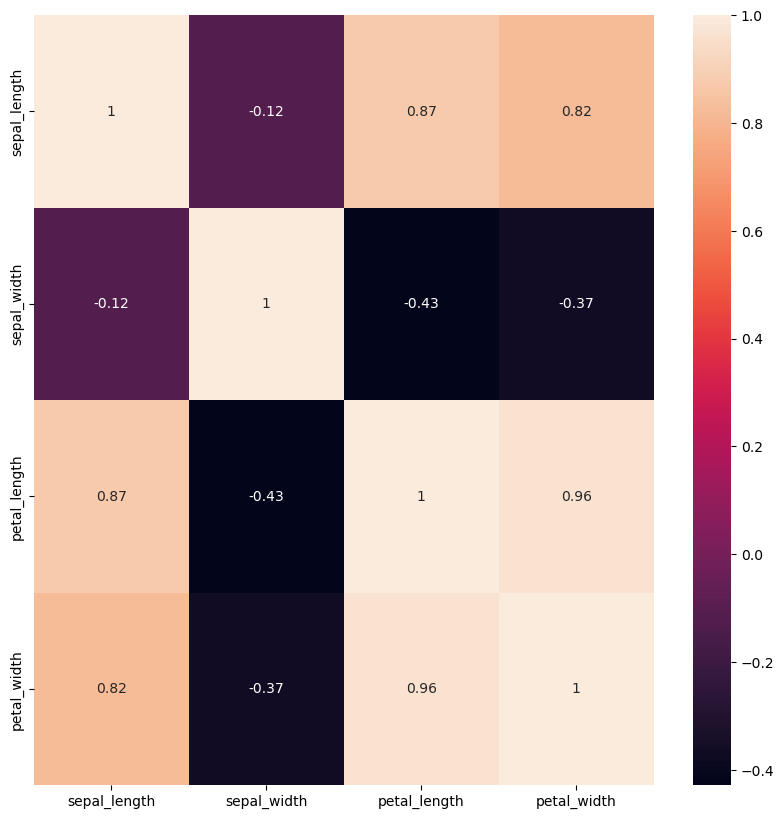

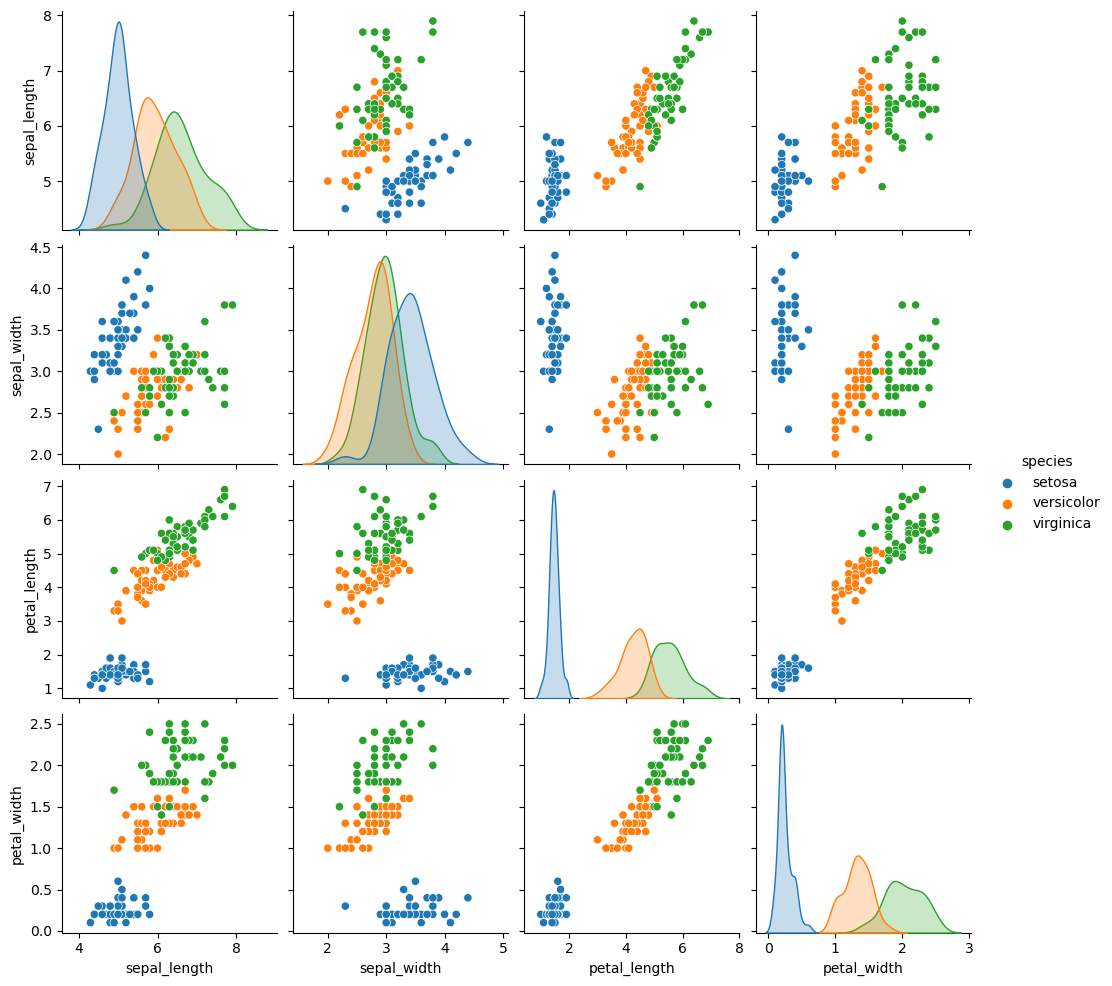

In [27]:
bivariate(data)

In [28]:
def kde_plot(iris):
    fig, ax = plt.subplots(figsize = (8, 6))
    sns.kdeplot(data=data, x="sepal_length", hue="species", ax  = ax)
    
    
    

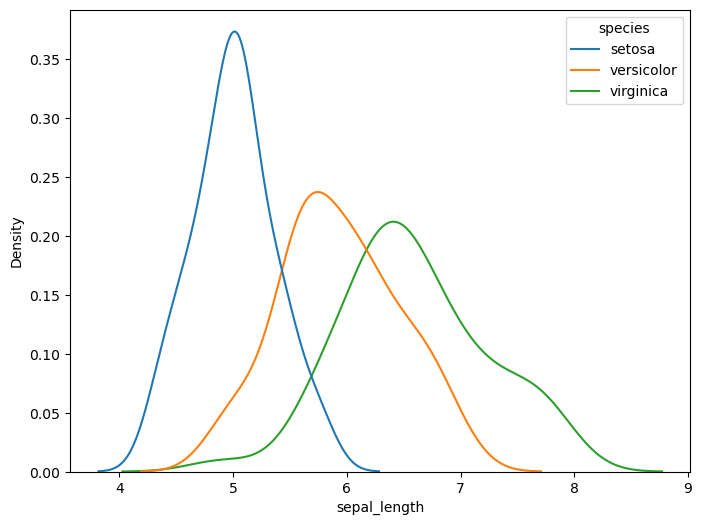

In [29]:
kde_plot('sepal_length')

In [30]:
#as we can see in the below analysis, the peak has most number of data for sepal lenght  which is around 31 setosa,21 for versicolor and 27 for virginica
# we got the  mean for each  species in  setosa  aroud 5.0,versicolor is 5.9 & 6.5 for virginica respectively

In [31]:
def more_insight(feature):
    print('This is total sum of setosa is ', ((data.loc[data['species'] == 'setosa', feature] > 4.6) & (data.loc[data['species'] == 'setosa', feature] < 5.4)).sum())
    print('This is total sum of versicolor is ',((data.loc[data['species'] == 'versicolor', feature] > 5.4) & (data.loc[data['species'] == 'versicolor', feature] < 6.5)).sum())
    print('This is total sum of virginica is',((data.loc[data['species'] == 'virginica', feature] > 6.1 ) & (data.loc[data['species'] == 'virginica', feature] < 7.1)).sum())

In [32]:
more_insight('sepal_length')

This is total sum of setosa is  31
This is total sum of versicolor is  35
This is total sum of virginica is 27


In [33]:
data.groupby('species')['sepal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [34]:
data.groupby('species')['sepal_length'].mean()

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

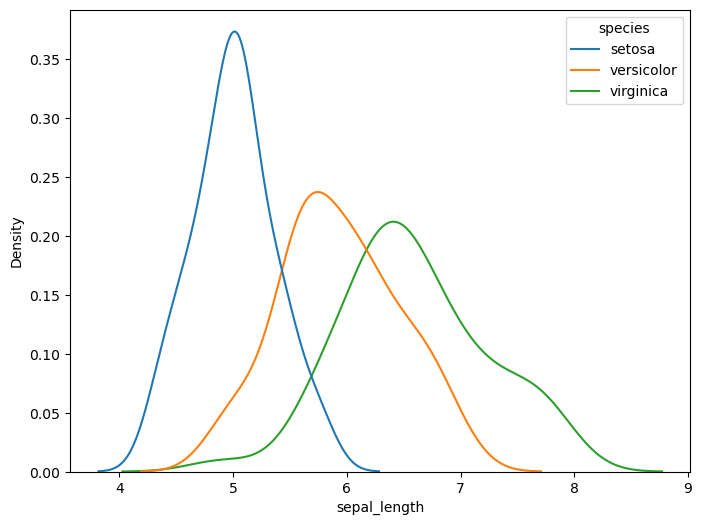

In [35]:
kde_plot('sepal_width')

In [36]:
more_insight('sepal_width')

This is total sum of setosa is  0
This is total sum of versicolor is  0
This is total sum of virginica is 0


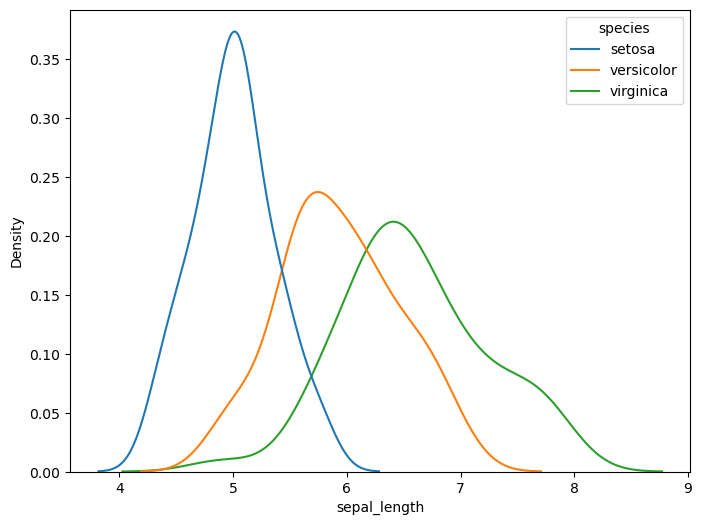

In [37]:
kde_plot('petal_length')

In [38]:
more_insight('petal_length')

This is total sum of setosa is  0
This is total sum of versicolor is  0
This is total sum of virginica is 6


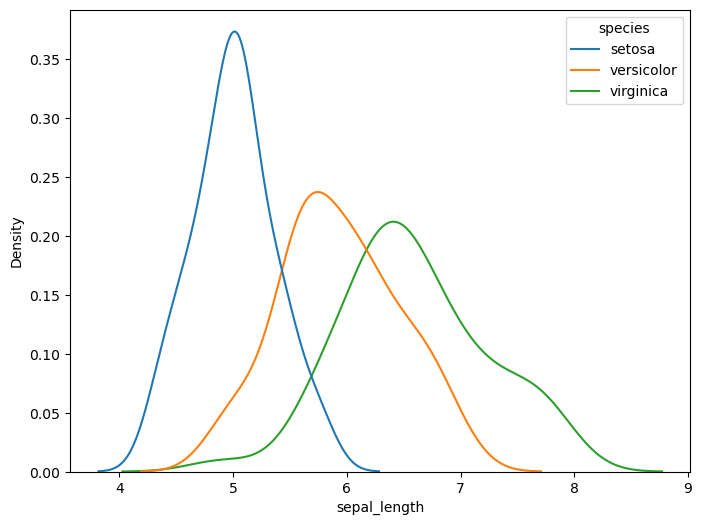

In [39]:
kde_plot('petal_width')

In [40]:
more_insight('petal_width')

This is total sum of setosa is  0
This is total sum of versicolor is  0
This is total sum of virginica is 0


In [41]:
# Applying decision tree algorithm

X = data.drop('species', axis = 1)
y = data['species']

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [44]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
train_pred = dtc.predict(x_train)

In [46]:
#importing accuracy score to measure the prediction made
from sklearn.metrics import f1_score, accuracy_score
accuracy_score(train_pred, y_train)

1.0

In [47]:
test_pred = dtc.predict(x_test)

In [48]:
accuracy_score(test_pred, y_test)

0.9473684210526315

In [49]:
#comparing the accuracy  true values and predicted values
pd.DataFrame({'True values': y_test, 'Predicted values': test_pred}).head(25)

,True values,Predicted values
33,setosa,setosa
121,virginica,virginica
144,virginica,virginica
6,setosa,setosa
138,virginica,virginica
129,virginica,versicolor
122,virginica,virginica
101,virginica,virginica
90,versicolor,versicolor
114,virginica,virginica


In [50]:
def max_depth(k):
    train_error = []
    test_error  = []
    for i in k:
        dtc = DecisionTreeClassifier(max_depth=i)
        dtc.fit(x_train, y_train)
        train_pred = dtc.predict(x_train)
        train_error.append(1 - accuracy_score(train_pred, y_train))
        
        test_pred = dtc.predict(x_test)
        test_error.append(1 - accuracy_score(test_pred, y_test))
        
    return train_error, test_error

In [51]:
n = range(1, 50)
train, test = max_depth(n)

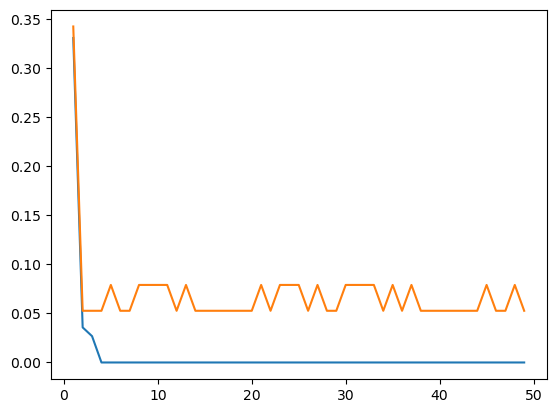

In [52]:
plt.plot(n, train, n, test)

In [53]:
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(x_train, y_train)
train_pred = dtc.predict(x_train)
print(accuracy_score(train_pred, y_train))
        
test_pred = dtc.predict(x_test)
print(accuracy_score(test_pred, y_test))

0.9642857142857143
0.9473684210526315
